In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# loading the dataset and displaying it
df=pd.read_csv("/content/IR_Dataset_Assignment_3.txt", sep=" ", header=None, names=["source", "destination", "time"])
df

,source,destination,time
0,163,164,24892
1,163,123,24892
2,163,147,24892
3,163,75,24892
4,134,145,26648
...,...,...,...
46767,168,135,45314032
46768,9,56,45320940
46769,56,135,45321233
46770,56,135,45321386


In [ ]:
# dropping the unnecessary column and displaying it
df.drop(["time"], axis = 1, inplace = True)
df

,source,destination
0,163,164
1,163,123
2,163,147
3,163,75
4,134,145
...,...,...
46767,168,135
46768,9,56
46769,56,135
46770,56,135


In [ ]:
# taking the source and destination unique values from the dataframe into 2 lists - src, des and finally displaying them
src = df.source.unique().tolist()
des = df.destination.unique().tolist()
print("source nodes ===> " + str(src))
print("destination nodes ===> " + str(des))

source nodes ===> [163, 134, 164, 147, 171, 169, 122, 144, 145, 75, 28, 123, 119, 114, 0, 98, 161, 70, 62, 81, 130, 137, 127, 35, 86, 165, 33, 154, 66, 141, 82, 64, 3, 39, 52, 47, 104, 60, 5, 72, 92, 14, 115, 138, 53, 22, 23, 7, 140, 27, 71, 46, 80, 51, 156, 77, 155, 44, 36, 152, 126, 11, 84, 49, 42, 158, 26, 139, 41, 58, 73, 150, 37, 117, 55, 45, 99, 102, 61, 90, 24, 68, 65, 91, 40, 57, 146, 2, 63, 142, 76, 157, 10, 97, 153, 78, 94, 167, 43, 30, 32, 148, 151, 18, 15, 170, 124, 54, 74, 50, 107, 116, 100, 96, 19, 21, 101, 135, 56, 111, 168, 9, 85, 121, 132, 87, 89, 103, 160, 143, 48, 31]
destination nodes ===> [164, 123, 147, 75, 145, 163, 169, 144, 119, 171, 122, 28, 134, 0, 70, 161, 114, 128, 98, 159, 25, 62, 81, 165, 82, 52, 137, 130, 5, 14, 60, 127, 35, 66, 154, 39, 104, 47, 3, 86, 64, 33, 72, 141, 92, 79, 125, 138, 115, 6, 133, 83, 13, 53, 22, 156, 80, 7, 155, 36, 27, 126, 46, 69, 51, 152, 44, 11, 71, 12, 23, 140, 49, 93, 162, 136, 158, 42, 139, 26, 41, 112, 73, 45, 58, 37, 150, 11

In [ ]:
len(src)        # displaying the length of src list 

132

In [ ]:
len(des)        # displaying the length of des list

154

In [ ]:
# creating a dataframe with rows as src list values and columns as des list values and the dataframe is filled with 0 and finally displaying it
matrix = pd.DataFrame(0, index=np.arange(len(src)), columns=des)
matrix.index = src
matrix

# reference = https://stackoverflow.com/questions/62827210/adding-rows-of-zeros-in-pandas 

,164,123,147,75,145,163,169,144,119,171,...,87,88,132,103,67,1,160,48,31,20
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Adjacency Matrix

In [ ]:
# updating the values in the dataframe which will be a adjacency matrix and displaying it
for i in range(0, len(df)):
  r_val = df.loc[i, "source"]       #take out source node
  c_val = df.loc[i, "destination"]  #take out destination node
  matrix.at[r_val, c_val]=matrix.at[r_val, c_val] + 1           #increment that corresponding cells value in the matrix

matrix

,164,123,147,75,145,163,169,144,119,171,...,87,88,132,103,67,1,160,48,31,20
163,34,10,18,7,2,0,6,2,12,4,...,0,0,0,0,0,0,0,0,0,0
134,4,4,3,3,10,6,3,3,20,3,...,0,0,0,0,0,0,0,0,0,0
164,0,21,12,0,4,18,0,0,5,2,...,0,0,0,0,0,0,0,0,0,0
147,12,12,0,24,15,15,10,2,26,22,...,0,0,0,0,0,0,0,0,0,0
171,16,13,29,8,134,9,52,10,32,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,58,0,20,0,0,0,0,11,0,0
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,1,10,0,0,0,0,0,0


#Adjacency List

In [ ]:
# calculating the adjacecny list and displaying it
adj_list ={}
for i in src:
  adj_list[i] = []          #create an empty adjacency list initially

for i in src:
  for j in des:
    if matrix.at[i,j]!=0:   # for any non zero value we add that node to our adjacency list
      adj_list[i].append(j)

for k, v in adj_list.items():     #display the result
  print(str(k) + ' ===> ' + str(v))

163 ===> [164, 123, 147, 75, 145, 169, 144, 119, 171, 122, 28, 134, 0, 70, 161, 114, 98]
134 ===> [164, 123, 147, 75, 145, 163, 169, 144, 119, 171, 122, 28, 0, 70, 161, 114, 98]
164 ===> [123, 147, 145, 163, 119, 171, 122, 28, 134, 70]
147 ===> [164, 123, 75, 145, 163, 169, 144, 119, 171, 122, 28, 134, 0, 70, 161, 114, 98, 159, 62, 81]
171 ===> [164, 123, 147, 75, 145, 163, 169, 144, 119, 122, 28, 134, 0, 70, 161, 114, 128, 98, 159, 25, 62, 81]
169 ===> [147, 75, 163, 144, 171, 122]
122 ===> [164, 123, 147, 75, 145, 163, 169, 144, 119, 171, 28, 134, 0, 70, 161, 114, 98]
144 ===> [164, 123, 147, 75, 145, 163, 169, 119, 171, 122, 28, 134, 0, 70, 161, 114, 128, 98, 159]
145 ===> [164, 123, 147, 75, 163, 169, 119, 171, 122, 28, 134, 0, 70, 161, 98, 81]
75 ===> [164, 147, 145, 163, 119, 171, 122, 28, 134, 98]
28 ===> [164, 123, 147, 75, 145, 163, 169, 144, 119, 171, 122, 134, 0, 70, 161, 114, 128, 98, 159, 81]
123 ===> [164, 147, 75, 163, 119, 171, 122, 28, 134, 0, 98, 81]
119 ===> [164, 12

#Number of nodes

In [ ]:
# taking union of set(src) and set(des) which will give the unique nodes in the graph 
nodes = set(src).union(set(des))
len(nodes)

162

#Number of Edges

In [ ]:
count=0
for i in src:
  for j in des:
    if matrix.at[i,j] != 0:    #take sum of number of mail sent from eevery participant in case of temporal edges
      count = count+matrix.at[i,j]

print("Temporal Edges ===> "+ str(count))

Temporal Edges ===> 46772


In [ ]:
count=0
for i in src:
  for j in des:
    if matrix.at[i,j] != 0:   #take sum of all the non zero elements from the matrix for static graph
      count = count+1

print("Edges in static graph ===> "+ str(count))

Edges in static graph ===> 1772


#Avg In-degree

In [ ]:
in_degree={}
for i in des:
  in_degree[i] = sum(matrix[i])    #perform sum column wise to find number of incoming edges on a particular node

val = in_degree.values()
avg_in_degree = sum(val) / len(nodes)   #take average by dividing with total number of nodes
print("Average In-degree ===> " + str(avg_in_degree))

Average In-degree ===> 288.71604938271605


In [ ]:
len(in_degree)

154

In [ ]:
nodes - in_degree.keys()       # these are the nodes which does not have any incoming edge

{19, 32, 50, 77, 84, 100, 102, 143}

Note that the average indegree gives you an idea of the typical number of incoming edges for a node in the graph. A high average indegree suggests that the graph is highly interconnected, while a low average indegree suggests that the graph is more sparse.

#Avg. Out-Degree

In [ ]:
out_degree={}
res = matrix.sum(axis = 1)   #perform sum row wise to find number of incoming edges on a particular node

for i in src:
  out_degree[i] = res[i]

val = out_degree.values()
avg_out_degree = sum(val) / len(nodes)    #take average by dividing with total number of nodes
print("Average Out-degree ===> " + str(avg_out_degree))

Average Out-degree ===> 288.71604938271605


Note that the average outdegree gives you an idea of the typical number of outgoing edges for a node in the graph. A high average outdegree suggests that the graph is highly connected, while a low average outdegree suggests that the graph is more sparse.

#Node with Max In-degree

In [ ]:
max_in_degree = max(zip(in_degree.values(), in_degree.keys()))      #from all nodes find node with max in degree 
print("Node with max In-degree ===> " + str(max_in_degree[1]))    #node name
print("The in-degree of node with max in-degree ===> " + str(max_in_degree[0]))    #max indegree of that node

#Reference :  https://www.geeksforgeeks.org/python-get-key-with-maximum-value-in-dictionary/ 

Node with max In-degree ===> 24
The in-degree of node with max in-degree ===> 3825


#Node with Max out-degree

In [ ]:
max_out_degree = max(zip(out_degree.values(), out_degree.keys()))    #from all nodes find node with max out degree 
print("Node with max Out-degree ===> " + str(max_out_degree[1])) #node name
print("The out-degree of node with max out-degree ===> " + str(max_out_degree[0]))    #max outdegree of that node

Node with max Out-degree ===> 24
The out-degree of node with max out-degree ===> 4769


#The density of the network

In [ ]:
#reference :   http://users.cecs.anu.edu.au/~xlx/teaching/css2013/network-density.html#:~:text=The%20Density%20of%20a%20network,of%20edges%20in%20the%20graph.

vertices = len(nodes)
edges = count

density_of_nw = edges / (vertices *(vertices -1))
print("Density of network ===>  " + str(density_of_nw))

Density of network ===>  0.06793957518595199


The density of a network can range from 0 (for a completely disconnected graph) to 1 (for a fully connected graph). A higher density indicates a more tightly connected network, while a lower density suggests a more sparse or loosely connected network.

#degree distribution of the network

####Plot for out-degree distribution

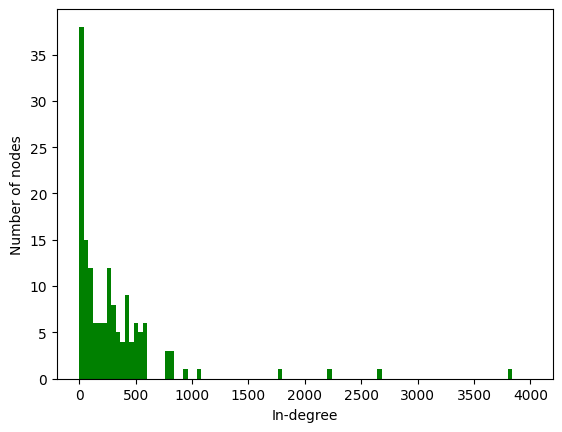

In [ ]:
#reference :   https://mathinsight.org/degree_distribution#:~:text=By%20counting%20how%20many%20nodes,%2C%20and%20k10%3D1.

plt.hist(list(in_degree.values()),bins=100,range=[1,4000],color='green')
plt.xlabel('In-degree')
plt.ylabel('Number of nodes')
plt.show()

####Plot for out-degree distribution

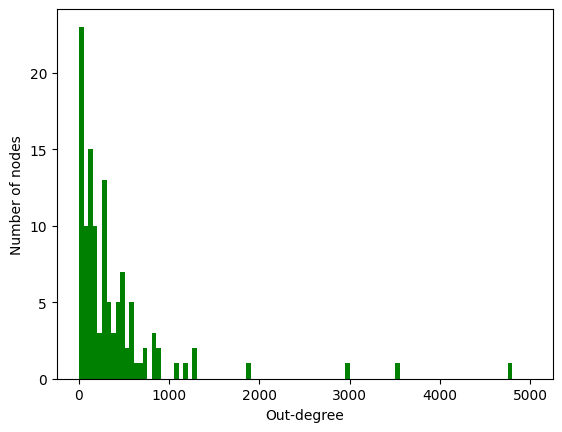

In [ ]:
plt.hist(list(out_degree.values()),bins=100,range=[10,5000],color='green')
plt.xlabel('Out-degree')
plt.ylabel('Number of nodes')
plt.show()

#local clustering coefficient

In [ ]:
print(nodes)        # displaying all the nodes from the graph 

{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171}


In [ ]:
len(nodes)    # displaying the length of all nodes from the graph

162

In [ ]:
# calculating the local clustering coefficient for every node in the graph
# For calculating this, we have considered the neighbour nodes as the outgoing edges
local_clustering_coeff = {}
for node in nodes:
  df_temp = df[df['source'] == node]    
  neighbor_nodes = set(df_temp['destination'])   # Taking the neighbor nodes of the current node
  
  adjacent_pairs = 0

  #from this we will obtain the adjacent pairs
  for neighbor_node in neighbor_nodes:
    df_neighbor = df[df['source'] == neighbor_node]
    for neighbor in set(df_neighbor['destination']):
      if neighbor in neighbor_nodes:
        adjacent_pairs += 1

  #these are the possible pairs
  possible_pairs = len(neighbor_nodes) * (len(neighbor_nodes) - 1)
  if possible_pairs == 0 :
    local_clustering_coeff[node] = 0
  else:
    local_clustering_coeff[node] = adjacent_pairs / possible_pairs          #divide with adjacent pairs with possible pairs to obtain local clustering coeff of that node

In [ ]:
local_clustering_coeff

{0: 0.9523809523809523,
 1: 0,
 2: 0.5541125541125541,
 3: 0.6539855072463768,
 4: 0,
 5: 0.738562091503268,
 6: 0,
 7: 0.5052631578947369,
 9: 0.8666666666666667,
 10: 0.5024630541871922,
 11: 0.6633986928104575,
 12: 0,
 13: 0,
 14: 0.7573529411764706,
 15: 0.8636363636363636,
 18: 1.0,
 19: 0,
 20: 0,
 21: 1.0,
 22: 0.8589743589743589,
 23: 0.4980237154150198,
 24: 0.4879032258064516,
 25: 0,
 26: 0.7638888888888888,
 27: 0.7333333333333333,
 28: 0.5078947368421053,
 29: 0,
 30: 0.7708333333333334,
 31: 0,
 32: 0,
 33: 0.5880952380952381,
 35: 0.8583333333333333,
 36: 0.7523809523809524,
 37: 0.6388888888888888,
 39: 0.7337662337662337,
 40: 0.9861111111111112,
 41: 0.6549707602339181,
 42: 0.8111111111111111,
 43: 0.6928571428571428,
 44: 0.6373626373626373,
 45: 0.8035714285714286,
 46: 0.7417582417582418,
 47: 0.7026143790849673,
 48: 0.9642857142857143,
 49: 0.6666666666666666,
 50: 0,
 51: 0.8545454545454545,
 52: 0.7214285714285714,
 53: 0.9222222222222223,
 54: 0.75,
 55: 0.6

In [ ]:
local_clustering_coeff_freq = {}            # updating the frequency of local clustering coefficient values 
for coefficient in local_clustering_coeff.values():
  if coefficient != 0:
    if coefficient in local_clustering_coeff_freq:
      local_clustering_coeff_freq[coefficient] += 1
    else:
      local_clustering_coeff_freq[coefficient] = 1

In [ ]:
local_clustering_coeff_freq         # displaying the local clustering coefficient value and its frequency 

{0.9523809523809523: 2,
 0.5541125541125541: 1,
 0.6539855072463768: 1,
 0.738562091503268: 1,
 0.5052631578947369: 1,
 0.8666666666666667: 1,
 0.5024630541871922: 1,
 0.6633986928104575: 1,
 0.7573529411764706: 1,
 0.8636363636363636: 1,
 1.0: 11,
 0.8589743589743589: 1,
 0.4980237154150198: 1,
 0.4879032258064516: 1,
 0.7638888888888888: 1,
 0.7333333333333333: 2,
 0.5078947368421053: 1,
 0.7708333333333334: 1,
 0.5880952380952381: 1,
 0.8583333333333333: 1,
 0.7523809523809524: 1,
 0.6388888888888888: 2,
 0.7337662337662337: 1,
 0.9861111111111112: 1,
 0.6549707602339181: 1,
 0.8111111111111111: 1,
 0.6928571428571428: 1,
 0.6373626373626373: 1,
 0.8035714285714286: 1,
 0.7417582417582418: 1,
 0.7026143790849673: 1,
 0.9642857142857143: 1,
 0.6666666666666666: 2,
 0.8545454545454545: 1,
 0.7214285714285714: 1,
 0.9222222222222223: 1,
 0.75: 1,
 0.3625: 1,
 0.6796536796536796: 1,
 0.6805555555555556: 1,
 0.4566532258064516: 1,
 0.7124183006535948: 1,
 0.7842105263157895: 1,
 0.629166

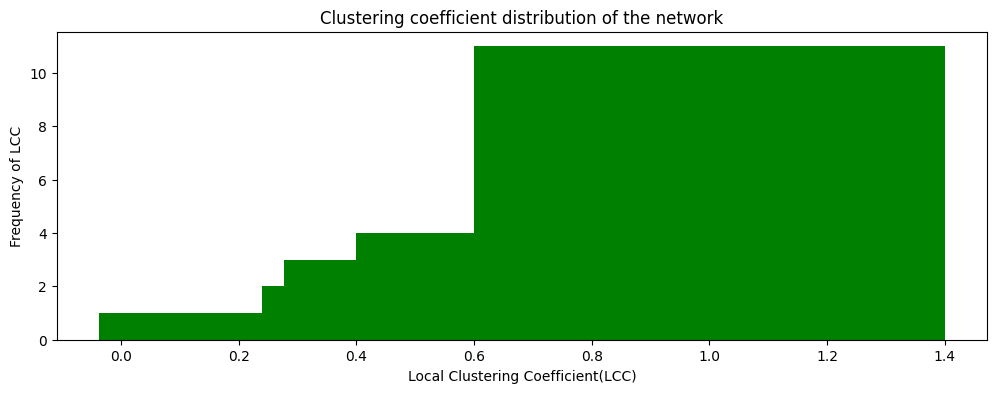

In [ ]:
# plotting the local clustering coefficient and frequency of LCC 
coeff = list(local_clustering_coeff_freq.keys())
freq = list(local_clustering_coeff_freq.values())
fig = plt.figure(figsize=(12, 4))
plt.bar(coeff, freq, color='green')
plt.title("Clustering coefficient distribution of the network")
plt.xlabel("Local Clustering Coefficient(LCC)")
plt.ylabel("Frequency of LCC")
plt.show()